In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import lmfit as lm
import scipy as sp
import corner
import emcee
import pandas as pd
from lc_lmfit import *

In [2]:
folder='data/'
filename='_LC_log.txt'

FXRTs=['FXRT_1','FXRT_2','FXRT_3','FXRT_4','FXRT_6','FXRT_7',
      'FXRT_8','FXRT_9','FXRT_10','FXRT_12','FXRT_13','FXRT_14',
      'FXRT_15','FXRT_16','FXRT_17','FXRT_18','FXRT_19','FXRT_20','FXRT_21','FXRT_22'] #'FXRT_5', 'FXRT_11' removed

indices = {'FXRT_1': [0, 37], 'FXRT_9':[1,-1]} #'FXRT_5':[0,2], 'FXRT_11':[0,21] removed

df = pd.read_csv('fxrt_refit_parameters.csv')

In [3]:
def make_subplot(i, dict, ax1, end_index=-1, start_index=0):
    time,flux,time_low,time_high,flux_low,flux_high = np.loadtxt(folder+dict["FXRT_Name"]+filename, unpack=True)
    ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high], markersize=5, label='data')
    
    x = np.geomspace(time[start_index], time[end_index],100)
    if i not in [4,10]: #don't plot best-fit for FXRT_5 and FXRT_11
        if np.isnan(dict["t_break"]):
            y = power_law(x, dict["alpha_1"], dict["amplitude"])
        else:
            y = broken_power_law(x, dict["t_break"], dict["alpha_1"], dict["alpha_2"], dict["amplitude"])
        ax1.loglog(x, y,label ='best fit', color='red', zorder=10)
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    ax1.set_xlabel('$\mathrm{Time(s)}$',fontsize=12.)
    ax1.set_ylabel('$\mathrm{Flux}$',fontsize=12.)
    ax1.set_title(dict["FXRT_Name"],fontsize=10)
    plt.subplots_adjust(hspace=0.5)

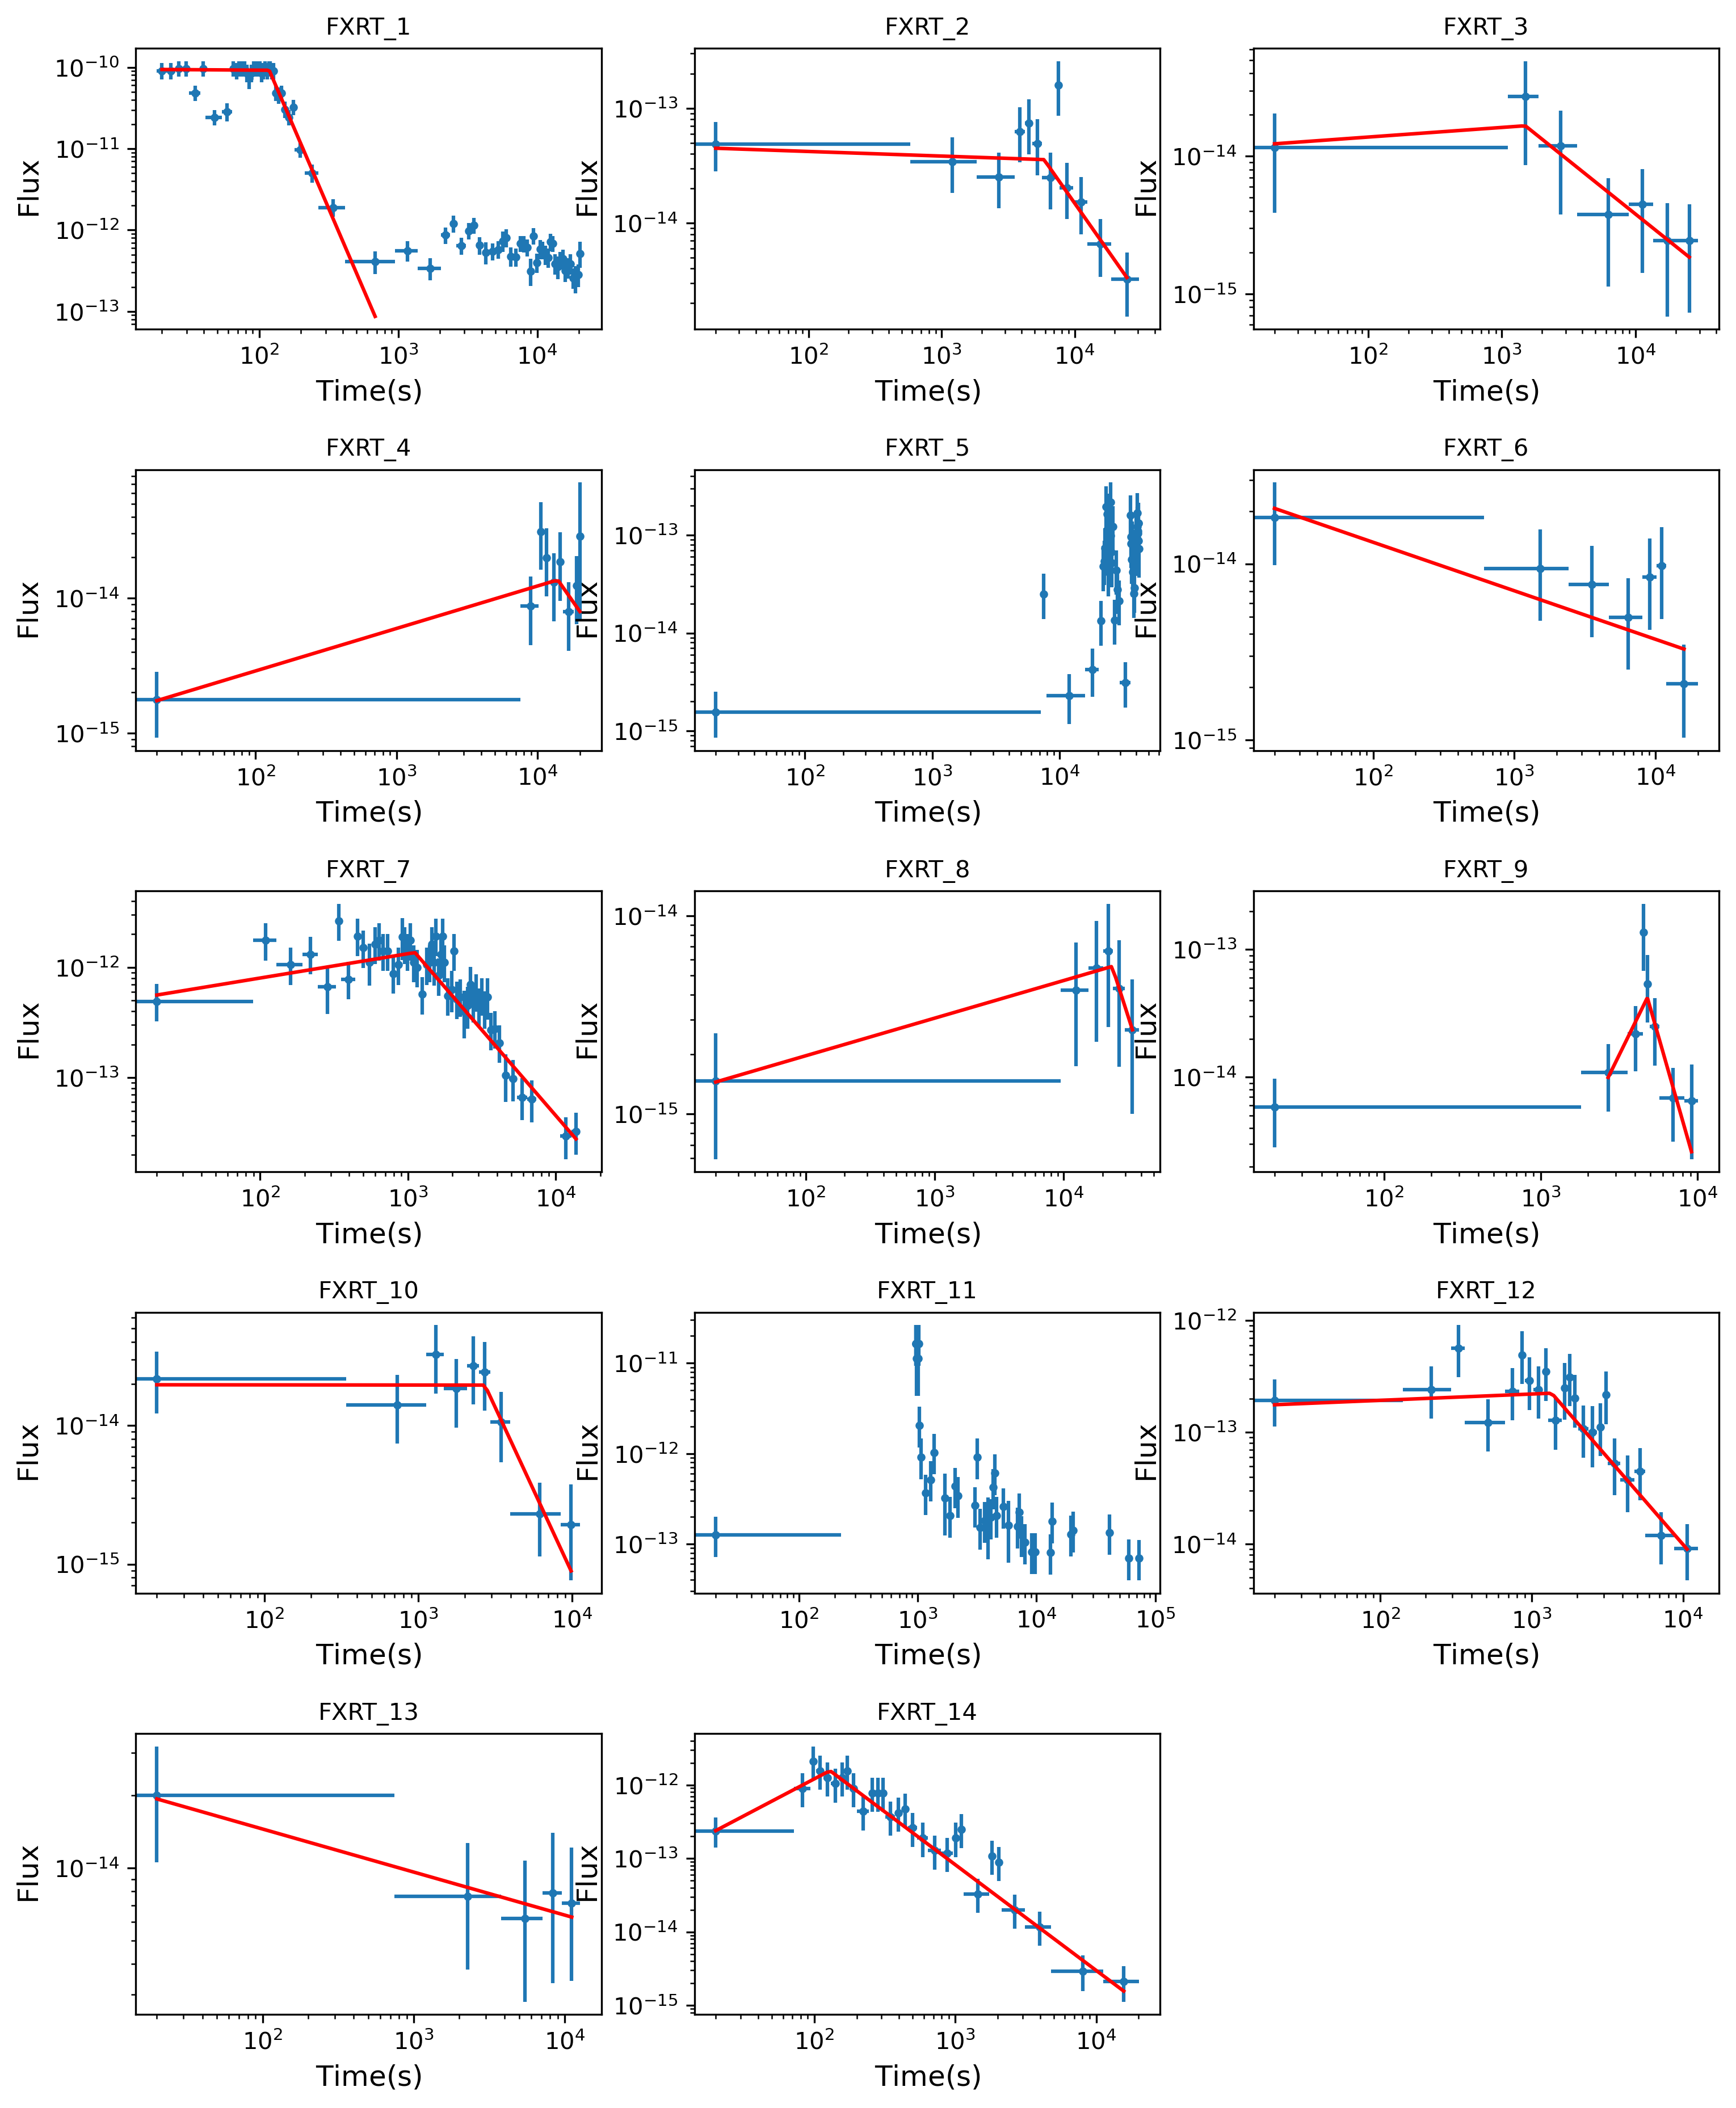

In [4]:
fig=plt.figure(figsize=(12.0,15.0), dpi=300)
fig.patch.set_facecolor('white')
refit_dicts = df.to_dict('records')

for i in range(14):
    ax1 = fig.add_subplot(5,3, i+1)
    if refit_dicts[i]["FXRT_Name"] in indices:
        start_index, end_index = indices[refit_dicts[i]["FXRT_Name"]]
        make_subplot(i, refit_dicts[i], ax1, end_index, start_index)
    else:
        make_subplot(i, refit_dicts[i], ax1)

plt.savefig('fxrt_refit_paper1.png', dpi=300, bbox_inches='tight')

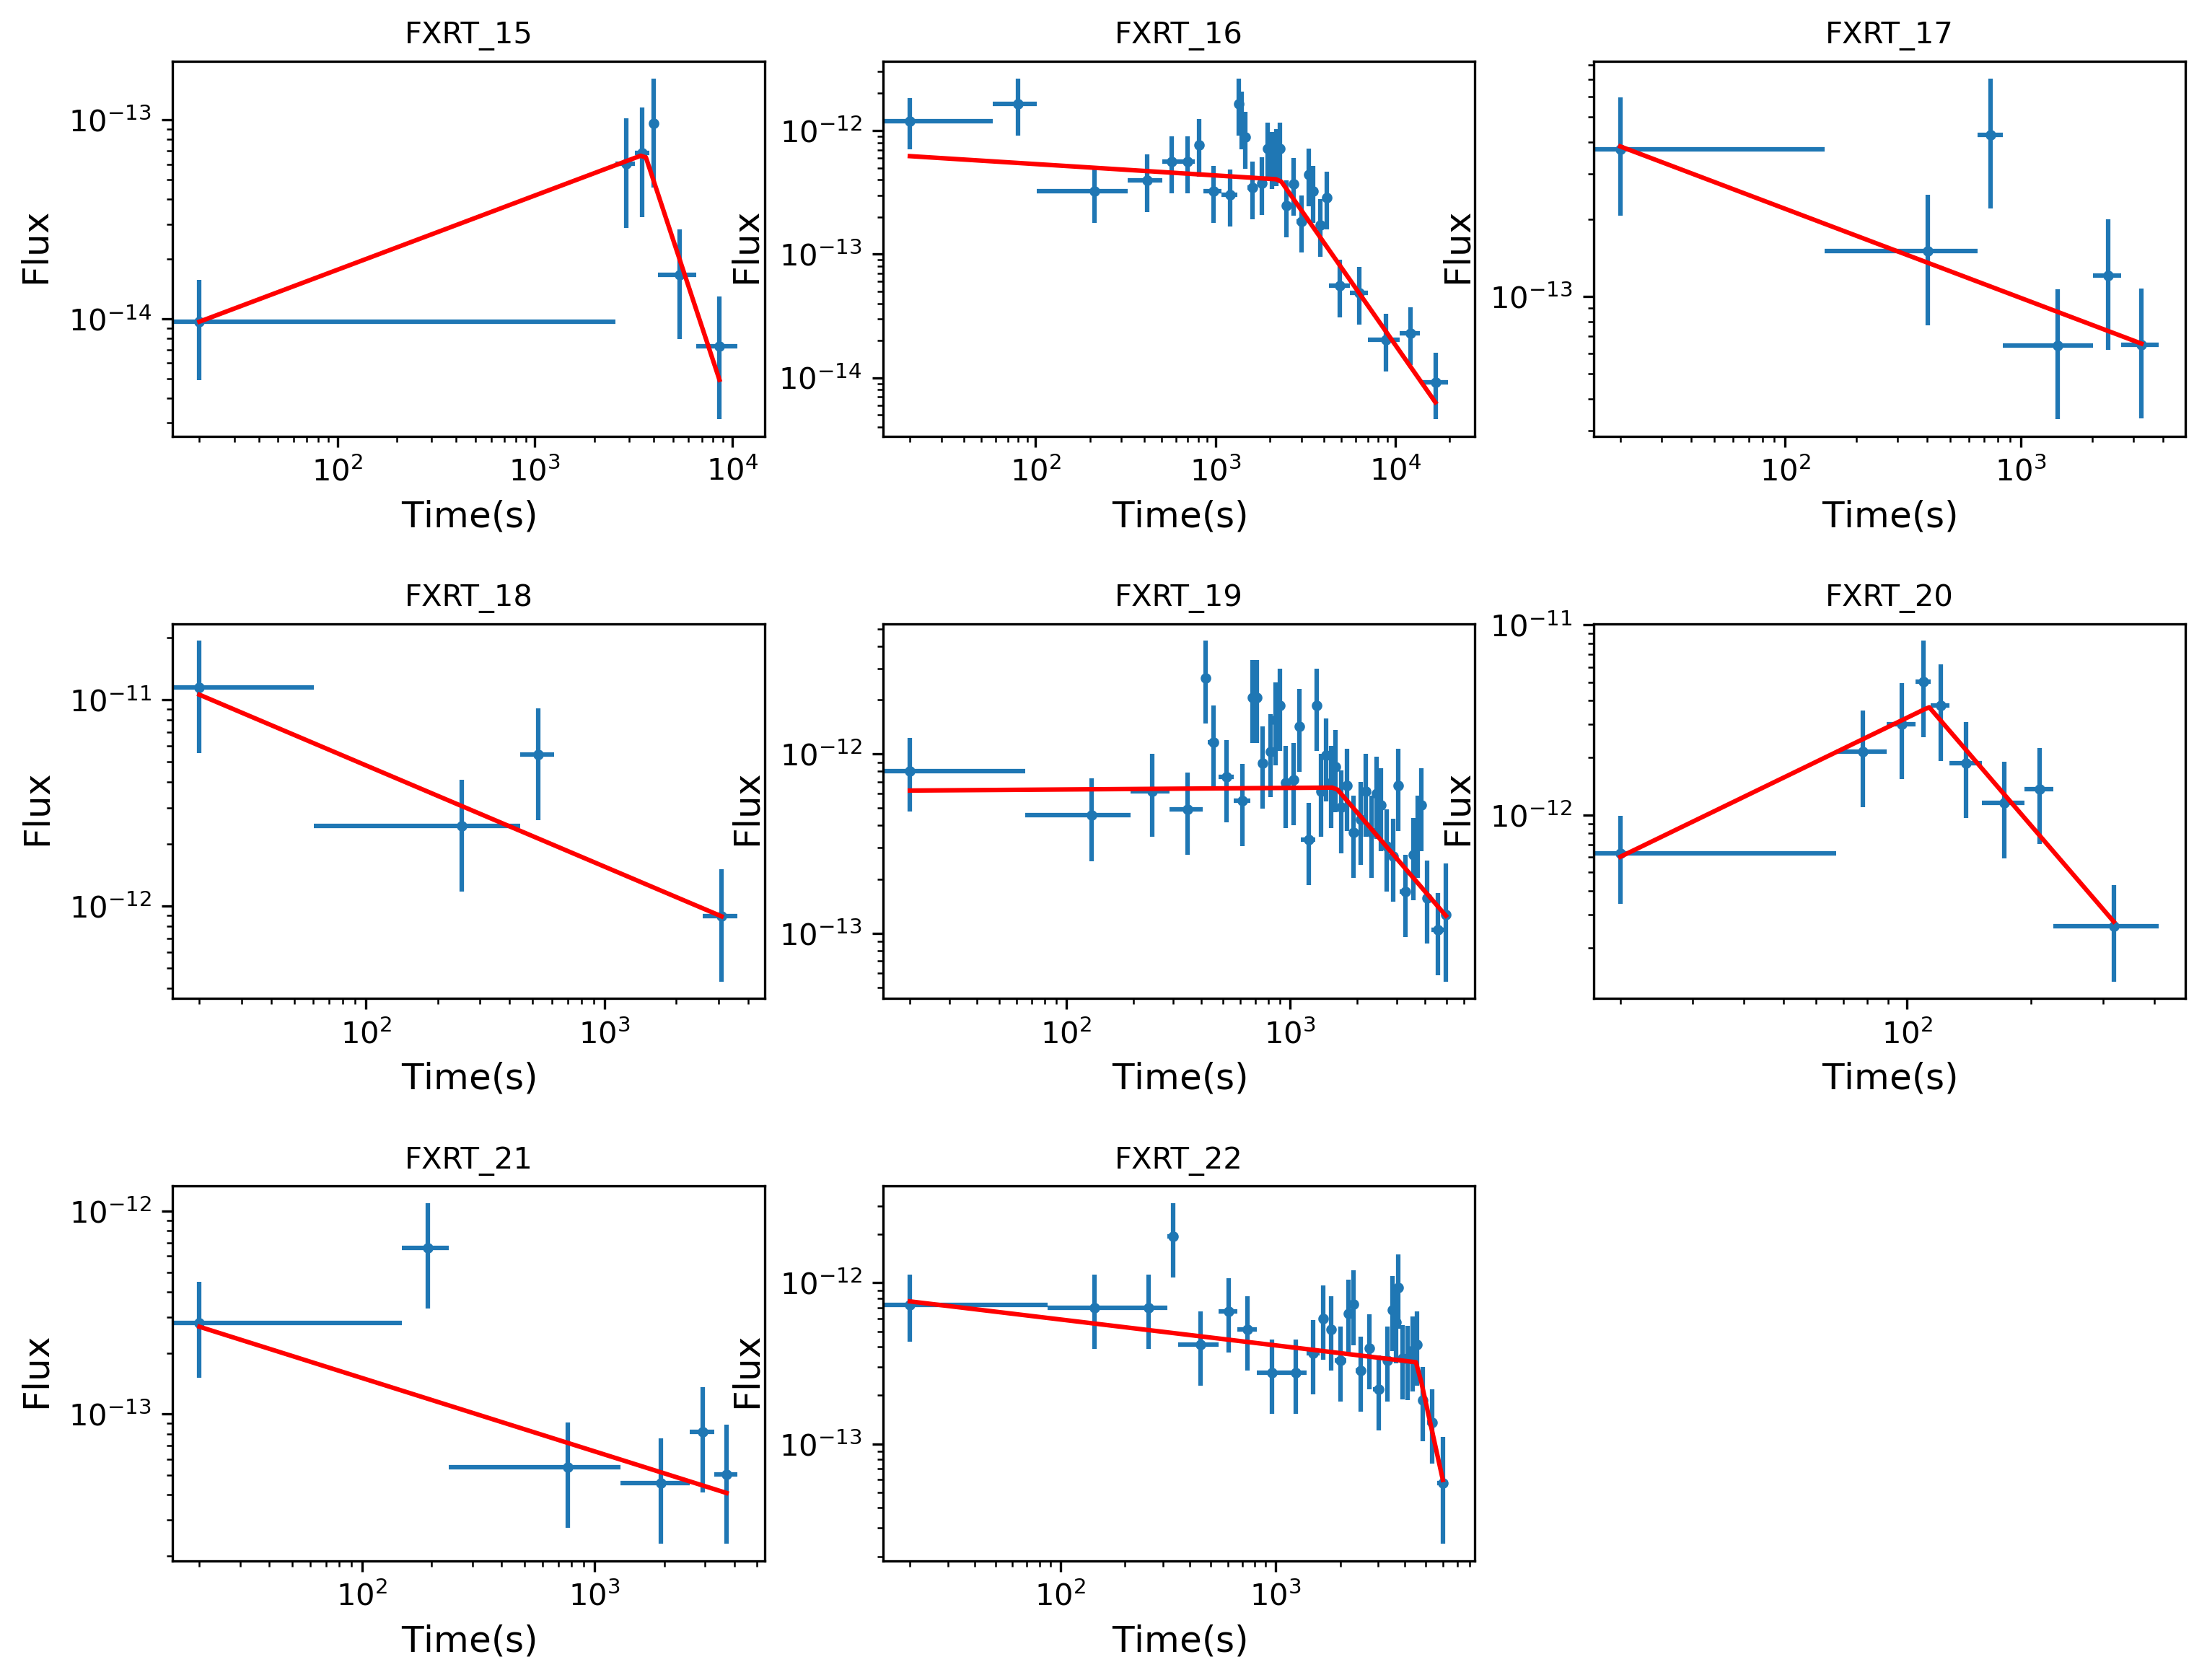

In [5]:
fig=plt.figure(figsize=(12.0,9.0), dpi=300)
fig.patch.set_facecolor('white')
refit_dicts = df.to_dict('records')

for i in range(14, 22):
    ax1 = fig.add_subplot(3,3, i-13)
    if refit_dicts[i]["FXRT_Name"] in indices:
        start_index, end_index = indices[refit_dicts[i]["FXRT_Name"]]
        make_subplot(i, refit_dicts[i], ax1, end_index, start_index)
    else:
        make_subplot(i, refit_dicts[i], ax1)
        
plt.savefig('fxrt_refit_paper2.png', dpi=300, bbox_inches='tight')

/var/folders/zj/ss0wvd7s3nxb2kdbh6g0gccw0000gn/T/ipykernel_27828/342276641.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fxt_data_none['Duration'] = 150


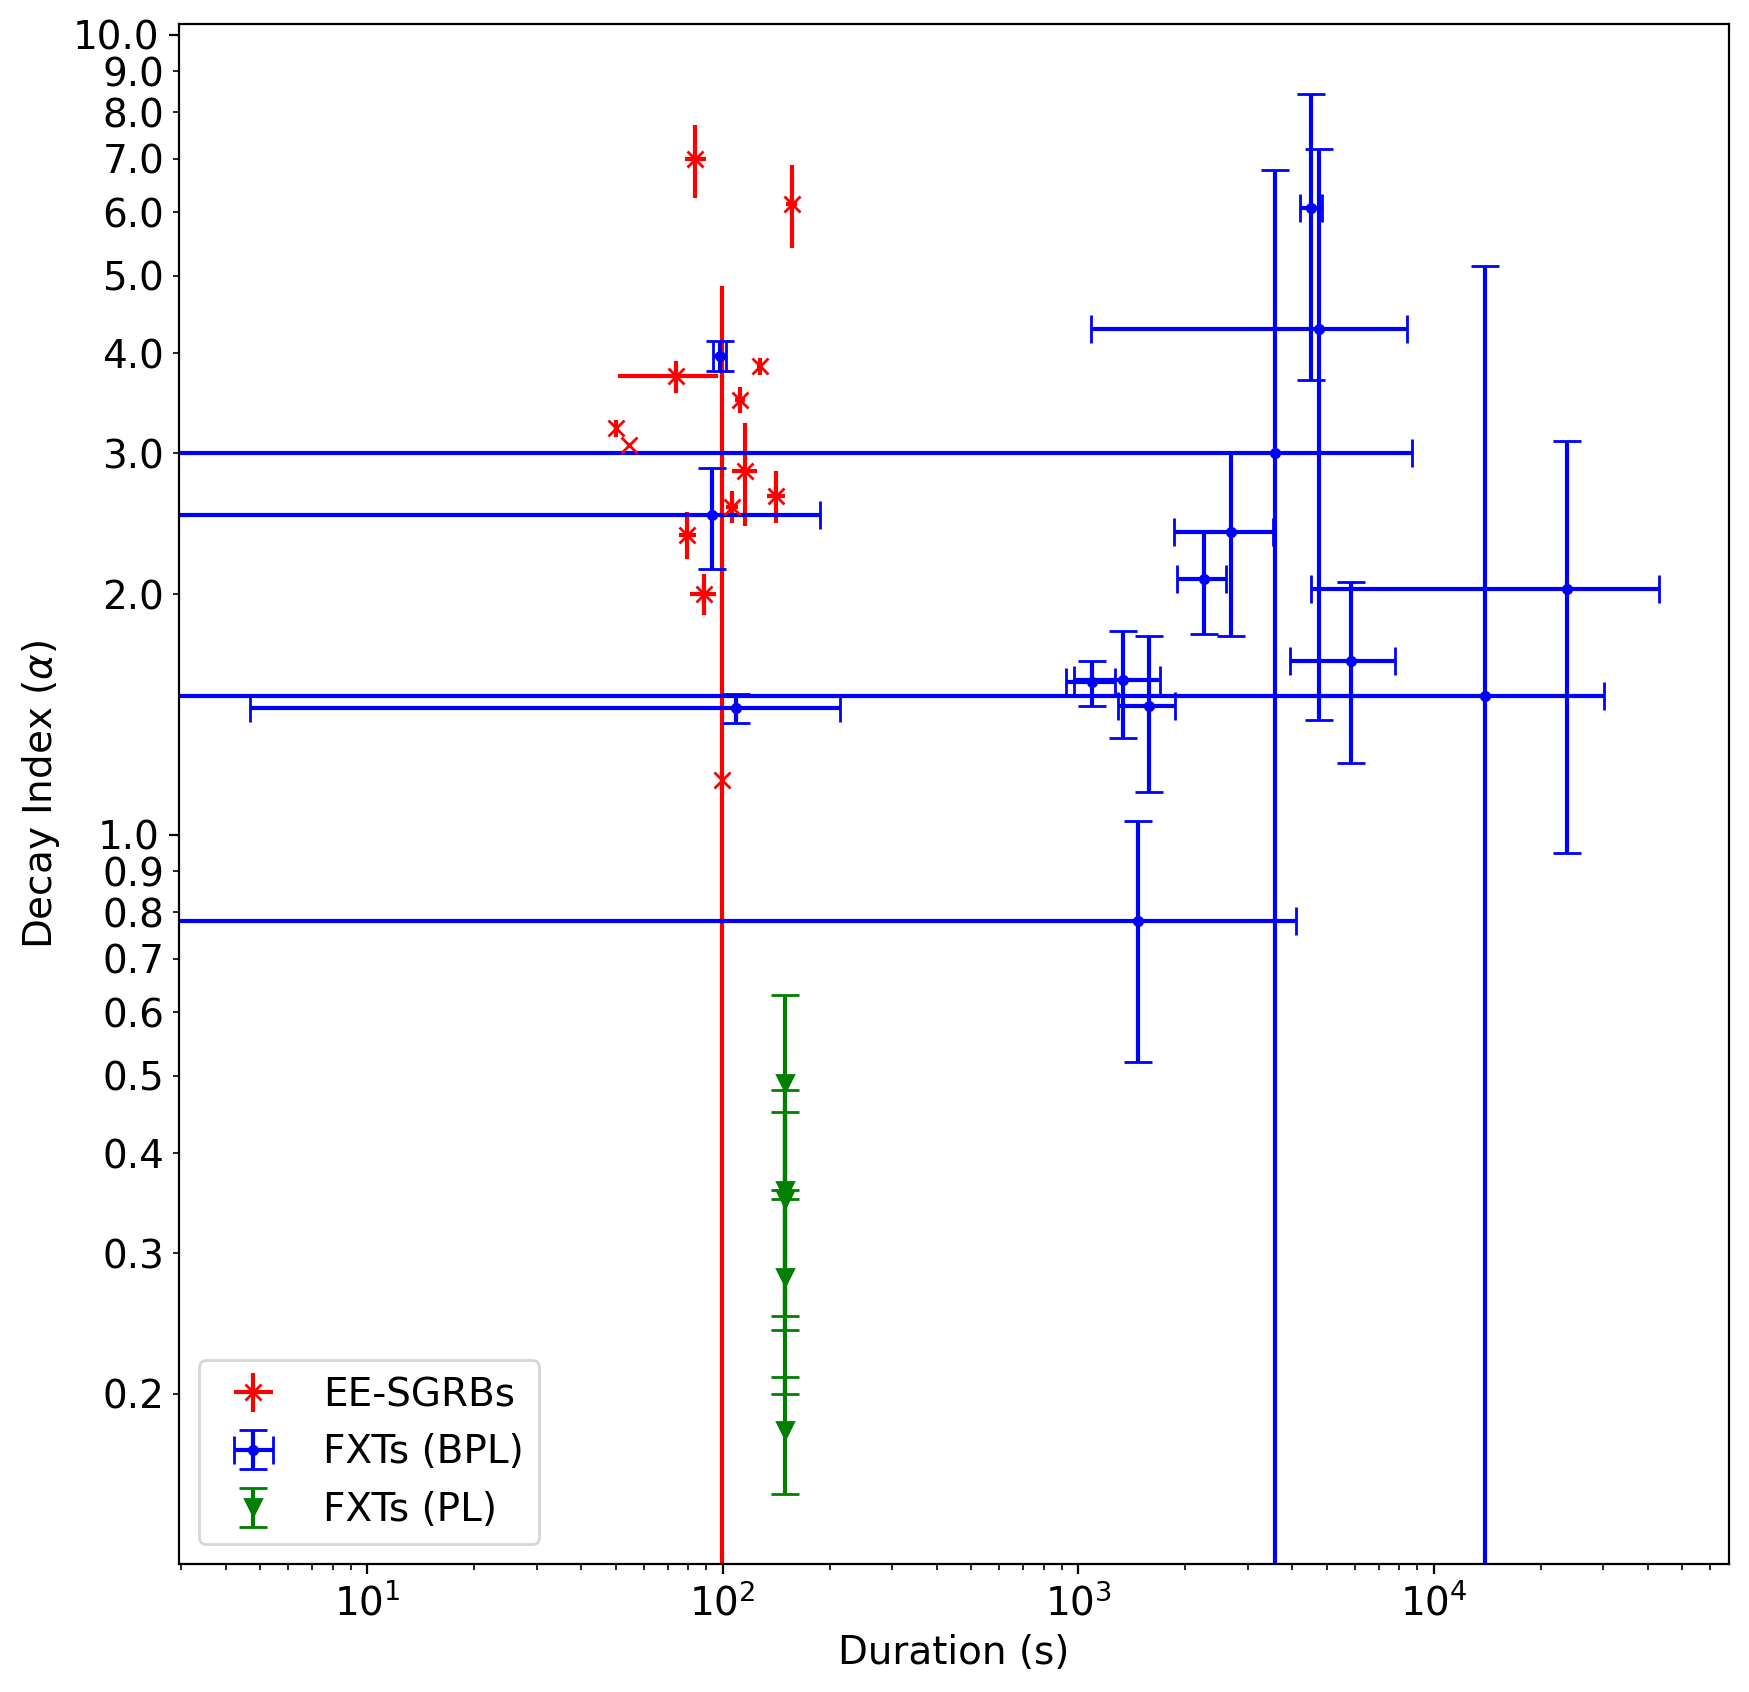

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

fig=plt.figure(figsize=(10.0,10.0), dpi=200)
plt.rcParams.update({'font.size': 14})

# Data from the second table (EE-SGRBs)
ee_data = {
    'ID': ['GRB 050724', 'GRB 051227', 'GRB 060614', 'GRB 061006', 'GRB 061210', 'GRB 070714B', 'GRB 071227', 'GRB 080123', 'GRB 080503', 'GRB 111121A', 'GRB 150424A', 'GRB 211211A', 'GRB 211227A'],
    'Duration': [127.4, 115.5, 54.6, 83.8, 99.4, 88.5, 156.2, 73.7, 112.2, 106.3, 141.6, 50.2, 79.5],
    'Alpha': [3.85, 2.85, 3.07, 6.99, 1.17, 2.00, 6.14, 3.74, 3.50, 2.57, 2.65, 3.22, 2.37],
    'Duration_Error': [2.20, 9.56, 0.59, 5.71, None, 7.40, 5.86, 23.03, 3.56, 4.26, 8.19, 0.89, 4.39],
    'Alpha_Error': [0.09, 0.42, 0.02, 0.73, 3.68, 0.12, 0.73, 0.17, 0.13, 0.12, 0.20, 0.08, 0.16]
}

df_ee = pd.DataFrame(ee_data)
# Plot for EE-SGRBs
plt.errorbar(df_ee['Duration'], df_ee['Alpha'], xerr=df_ee['Duration_Error'], yerr=df_ee['Alpha_Error'], marker='x', color='red', label='EE-SGRBs', ls='none')

# Data from the first table (FXTs)
fxt_data = {
    'ID': ['FXRT 1', 'FXRT 2', 'FXRT 3', 'FXRT 4', 'FXRT 6', 'FXRT 7', 'FXRT 8', 'FXRT 9', 'FXRT 10', 'FXRT 12', 'FXRT 13', 'FXRT 14', 'FXRT 15', 'FXRT 16', 'FXRT 17', 'FXRT 18', 'FXRT 19', 'FXRT 20', 'FXRT 21', 'FXRT 22'],
    'Duration': [98.15, 5867.51, 1477.84, 13897.63, None, 1094.08, 23733.57, 4762.65, 2688.70, 1337.00, None, 109.28, 3587.71, 2256.02, None, None, 1581.52, 93.06, None, 4529.37],
    'Alpha': [3.97, 1.65, 0.78, 1.49, 0.28, 1.55, 2.03, 4.29, 2.39, 1.56, 0.18, 1.44, 3.00, 2.09, 0.35, 0.49, 1.45, 2.51, 0.36, 6.07],
    'Duration_Error': [4.00, 1929.50, 2611.17, 16214.37, None, 172.66, 19222.26, 3673.19, 832.29, 362.19, None, 104.61, 5094.74, 354.77, None, None, 286.73, 94.64, None, 320.67],
    'Alpha_Error': [0.17, 0.42, 0.26, 3.65, 0.08, 0.10, 1.08, 2.90, 0.62, 0.24, 0.03, 0.06, 3.78, 0.31, 0.10, 0.14, 0.32, 0.36, 0.12, 2.37]
}


df_fxt = pd.DataFrame(fxt_data)


plt.errorbar(df_fxt['Duration'], df_fxt['Alpha'], xerr=df_fxt['Duration_Error'], yerr=df_fxt['Alpha_Error'], fmt='.', color='blue', label='FXTs (BPL)', ls='none', capsize=5)

fxt_data_none = df_fxt[df_fxt['Duration'].isnull()]
# Set duration to 100
fxt_data_none['Duration'] = 150
# Plot the data points with duration None on top of the current plot
plt.errorbar(fxt_data_none['Duration'], fxt_data_none['Alpha'], yerr=fxt_data_none['Alpha_Error'], fmt='v', color='green', label="FXTs (PL)", ls='none', capsize=5)


plt.xlabel('Duration (s)')
plt.ylabel(r"Decay Index ($\alpha$)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.gca().yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
# plt.tight_layout()
plt.savefig("comparison.png")
plt.show()

/var/folders/zj/ss0wvd7s3nxb2kdbh6g0gccw0000gn/T/ipykernel_27828/3741439978.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fxt_data_none['Duration'] = 150


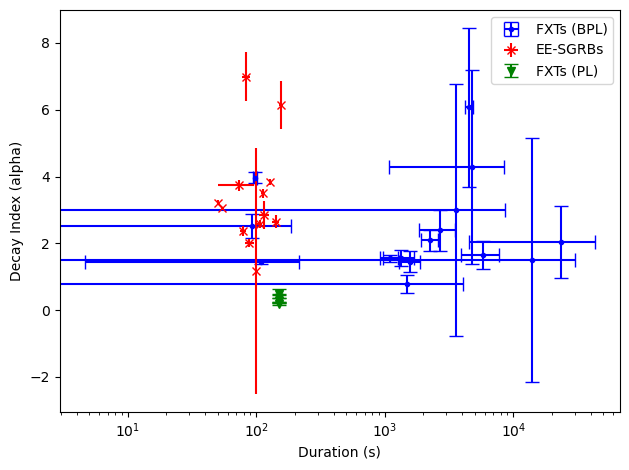

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


# Data from the first table (FXTs)
fxt_data = {
    'ID': ['FXRT 1', 'FXRT 2', 'FXRT 3', 'FXRT 4', 'FXRT 6', 'FXRT 7', 'FXRT 8', 'FXRT 9', 'FXRT 10', 'FXRT 12', 'FXRT 13', 'FXRT 14', 'FXRT 15', 'FXRT 16', 'FXRT 17', 'FXRT 18', 'FXRT 19', 'FXRT 20', 'FXRT 21', 'FXRT 22'],
    'Duration': [98.15, 5867.51, 1477.84, 13897.63, None, 1094.08, 23733.57, 4762.65, 2688.70, 1337.00, None, 109.28, 3587.71, 2256.02, None, None, 1581.52, 93.06, None, 4529.37],
    'Alpha': [3.97, 1.65, 0.78, 1.49, 0.28, 1.55, 2.03, 4.29, 2.39, 1.56, 0.18, 1.44, 3.00, 2.09, 0.35, 0.49, 1.45, 2.51, 0.36, 6.07],
    'Duration_Error': [4.00, 1929.50, 2611.17, 16214.37, None, 172.66, 19222.26, 3673.19, 832.29, 362.19, None, 104.61, 5094.74, 354.77, None, None, 286.73, 94.64, None, 320.67],
    'Alpha_Error': [0.17, 0.42, 0.26, 3.65, 0.08, 0.10, 1.08, 2.90, 0.62, 0.24, 0.03, 0.06, 3.78, 0.31, 0.10, 0.14, 0.32, 0.36, 0.12, 2.37]
}

df_fxt = pd.DataFrame(fxt_data)

# Data from the second table (EE-SGRBs)
ee_data = {
    'ID': ['GRB 050724', 'GRB 051227', 'GRB 060614', 'GRB 061006', 'GRB 061210', 'GRB 070714B', 'GRB 071227', 'GRB 080123', 'GRB 080503', 'GRB 111121A', 'GRB 150424A', 'GRB 211211A', 'GRB 211227A'],
    'Duration': [127.4, 115.5, 54.6, 83.8, 99.4, 88.5, 156.2, 73.7, 112.2, 106.3, 141.6, 50.2, 79.5],
    'Alpha': [3.85, 2.85, 3.07, 6.99, 1.17, 2.00, 6.14, 3.74, 3.50, 2.57, 2.65, 3.22, 2.37],
    'Duration_Error': [2.20, 9.56, 0.59, 5.71, None, 7.40, 5.86, 23.03, 3.56, 4.26, 8.19, 0.89, 4.39],
    'Alpha_Error': [0.09, 0.42, 0.02, 0.73, 3.68, 0.12, 0.73, 0.17, 0.13, 0.12, 0.20, 0.08, 0.16]
}

df_ee = pd.DataFrame(ee_data)

plt.errorbar(df_fxt['Duration'], df_fxt['Alpha'], xerr=df_fxt['Duration_Error'], yerr=df_fxt['Alpha_Error'], fmt='.', color='blue', label='FXTs (BPL)', ls='none', capsize=5)

# Plot for EE-SGRBs
plt.errorbar(df_ee['Duration'], df_ee['Alpha'], xerr=df_ee['Duration_Error'], yerr=df_ee['Alpha_Error'], marker='x', color='red', label='EE-SGRBs', ls='none')


fxt_data_none = df_fxt[df_fxt['Duration'].isnull()]

# Set duration to 100
fxt_data_none['Duration'] = 150

# Plot the data points with duration None on top of the current plot
plt.errorbar(fxt_data_none['Duration'], fxt_data_none['Alpha'], yerr=fxt_data_none['Alpha_Error'], fmt='v', color='green', label='FXTs (PL)', ls='none', capsize=5)

plt.xlabel('Duration (s)')
plt.ylabel('Decay Index (alpha)')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
fxt_data_none

,ID,Duration,Alpha,Duration_Error,Alpha_Error
4,FXRT 6,150,0.28,NaN,0.08
10,FXRT 13,150,0.18,NaN,0.03
14,FXRT 17,150,0.35,NaN,0.10
15,FXRT 18,150,0.49,NaN,0.14
18,FXRT 21,150,0.36,NaN,0.12
